In [22]:
import pandas as pd
import numpy as np
import os

In [23]:
file_paths=[r'C:\Users\DELL\Desktop\chicago crime\chicago_crime_2014.csv',r'C:\Users\DELL\Desktop\chicago crime\chicago_crime_2015.csv',r'C:\Users\DELL\Desktop\chicago crime\chicago_crime_2016.csv']

dfs = []

for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)



In [24]:
combined_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude
0,9446824,HX100141,01/01/2014 02:00:00 AM,0000X W ILLINOIS ST,0460,BATTERY,SIMPLE,STREET,False,False,1831,18,42.0,8.0,08B,41.890828,-87.630235
1,9446748,HX100020,01/01/2014 12:00:00 AM,006XX N DEARBORN ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,1832,18,42.0,8.0,06,41.893542,-87.629702
2,9446758,HX100030,01/01/2014 12:30:00 AM,052XX W RACE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,1523,15,28.0,25.0,14,41.890046,-87.756333
3,9446760,HX100027,01/01/2014 12:30:00 AM,053XX W WELLINGTON AVE,0460,BATTERY,SIMPLE,APARTMENT,True,False,2514,25,31.0,19.0,08B,41.935011,-87.759739
4,9446764,HX100054,01/01/2014 12:10:00 AM,014XX W LEXINGTON ST,0460,BATTERY,SIMPLE,STREET,False,False,1231,12,25.0,28.0,08B,41.872509,-87.663069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754536,10401460,HZ137801,01/17/2016 12:00:00 PM,014XX N ARTESIAN AVE,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,True,1423,14,1.0,24.0,26,41.907410,-87.688376
754537,10401463,HZ137802,01/16/2016 10:00:00 PM,012XX S WESTERN AVE,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,False,1233,12,25.0,28.0,26,41.866148,-87.686026
754538,10401576,HZ137703,01/08/2016 11:10:00 AM,057XX S CICERO AVE,0890,THEFT,FROM BUILDING,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,False,False,813,8,23.0,56.0,06,41.788987,-87.741480
754539,10401610,HZ138101,01/23/2016 01:00:00 AM,001XX S LEAVITT ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12,2.0,28.0,14,41.879418,-87.681489


In [25]:

# From what date is the oldest data point in the data set? 

oldest_date=combined_df["Date"].min()
oldest_date
print(f"Oldest date: {oldest_date}")

Oldest date: 01/01/2014 01:00:00 AM


In [26]:

# Which year had the largest amount of crimes and how many crimes were committed that year?

combined_df["Date"] = pd.to_datetime(combined_df["Date"])

combined_df["Year"] = combined_df["Date"].dt.year

year_with_most_crimes = combined_df['Year'].value_counts().idxmax()
max_crimes_count = combined_df['Year'].value_counts().max()

print("Year with the largest amount of crimes:", year_with_most_crimes)
print("Number of crimes committed that year:", max_crimes_count)


Year with the largest amount of crimes: 2014
Number of crimes committed that year: 274423


In [27]:

# Let's define "Arrest Rate" as the share of crimes that led to an arrest.
# What were the five most common crimes in 2020? Which of those has the highest and lowest arrest rate?

df_2020 = combined_df[combined_df["Year"] == 2016]

crime_counts_2020 = df_2020["Primary Type"].value_counts()

arrest_rates_2020 = df_2020.groupby("Primary Type")["Arrest"].mean()

top_5_crimes_2020 = crime_counts_2020.head(5)

highest_arrest_rate_crime = arrest_rates_2020[top_5_crimes_2020.index].idxmax()
lowest_arrest_rate_crime = arrest_rates_2020[top_5_crimes_2020.index].idxmin()

print("Five most common crimes in 2020:")
print(top_5_crimes_2020)
print("\nCrime with the highest arrest rate among the top five:", highest_arrest_rate_crime)
print("Arrest rate:", arrest_rates_2020[highest_arrest_rate_crime])
print("\nCrime with the lowest arrest rate among the top five:", lowest_arrest_rate_crime)
print("Arrest rate:", arrest_rates_2020[lowest_arrest_rate_crime])


Five most common crimes in 2020:
THEFT              49603
BATTERY            41950
CRIMINAL DAMAGE    25573
ASSAULT            15631
OTHER OFFENSE      13971
Name: Primary Type, dtype: int64

Crime with the highest arrest rate among the top five: BATTERY
Arrest rate: 0.20088200238379023

Crime with the lowest arrest rate among the top five: CRIMINAL DAMAGE
Arrest rate: 0.053728541821452314


Year with the highest arrest rate: 2014
Highest arrest rate: 0.28799699733622913


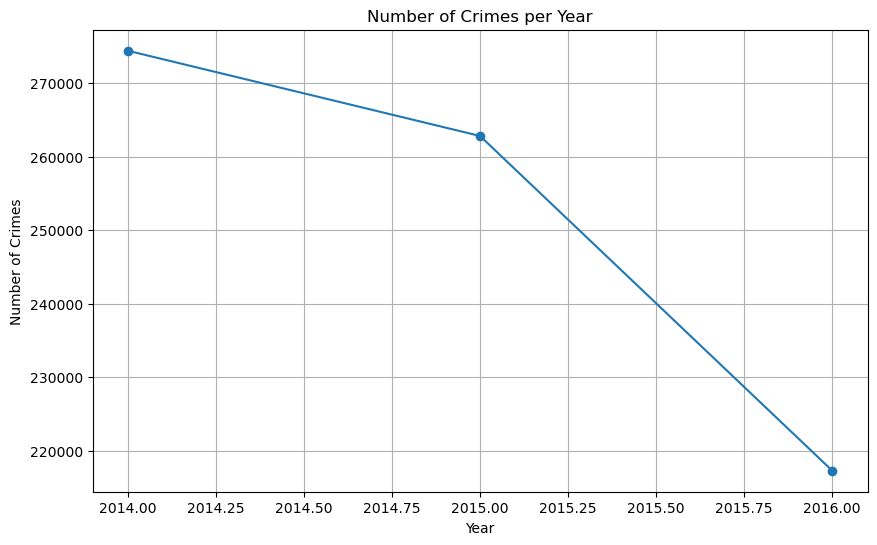

In [28]:

# What year had the highest arrest rate? Plot the number of crimes per year and comment on the trend.
import matplotlib.pyplot as plt

arrest_rates_by_year = combined_df.groupby("Year")["Arrest"].mean()

year_highest_arrest_rate = arrest_rates_by_year.idxmax()
highest_arrest_rate = arrest_rates_by_year.max()

print("Year with the highest arrest rate:", year_highest_arrest_rate)
print("Highest arrest rate:", highest_arrest_rate)

crime_counts_by_year = combined_df["Year"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(crime_counts_by_year.index, crime_counts_by_year.values, marker="o")
plt.title("Number of Crimes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.show()


Year with the most number of arrests: 2014
Number of arrests made during that year: 79033


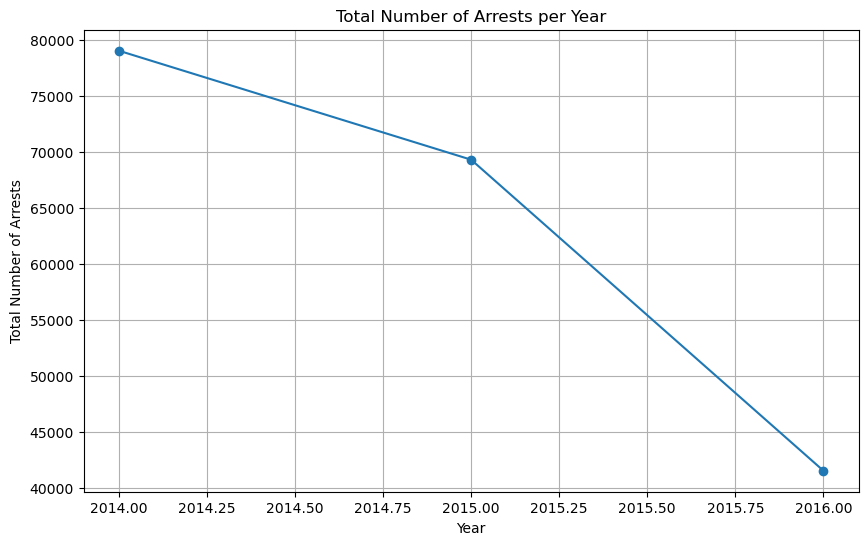

In [29]:

# Which year had the most number of crimes leading to an arrest? How many arrests were made during that year? Plot the trend for total number of arrests per year.

total_arrests_by_year = combined_df.groupby("Year")["Arrest"].sum()

year_most_arrests = total_arrests_by_year.idxmax()
most_arrests_count = total_arrests_by_year.max()

print("Year with the most number of arrests:", year_most_arrests)
print("Number of arrests made during that year:", most_arrests_count)

plt.figure(figsize=(10, 6))
plt.plot(total_arrests_by_year.index, total_arrests_by_year.values, marker="o")
plt.title("Total Number of Arrests per Year")
plt.xlabel("Year")
plt.ylabel("Total Number of Arrests")
plt.grid(True)
plt.show()


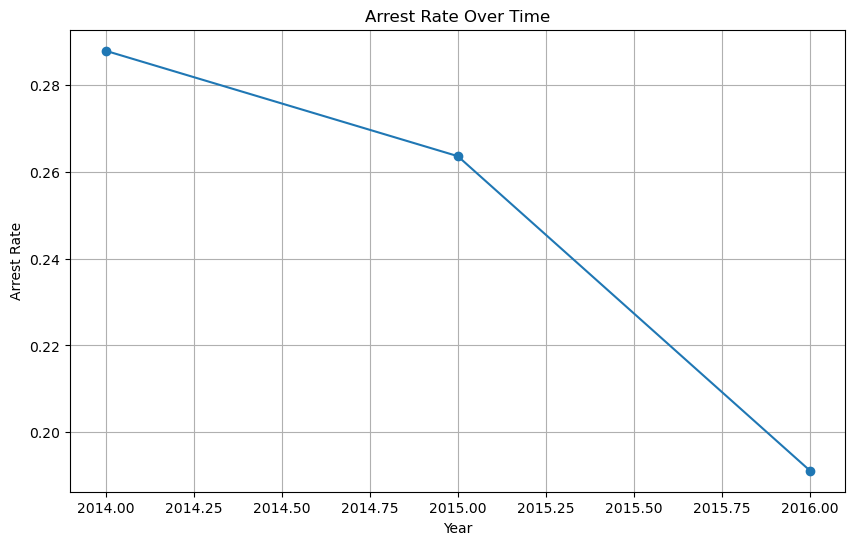

In [30]:

# How has the arrest rate looked like over time? 
#  Plot the trend of the arrest rate.
arrest_rates_by_year = combined_df.groupby("Year")["Arrest"].mean()

plt.figure(figsize=(10, 6))
plt.plot(arrest_rates_by_year.index, arrest_rates_by_year.values, marker="o")
plt.title("Arrest Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Arrest Rate")
plt.grid(True)
plt.show()


In [31]:
# - Between which years can you see the biggest change in "Arrest Rate"?

arrest_rate_diff = arrest_rates_by_year.diff()

year_max_increase = arrest_rate_diff.idxmax()
max_increase = arrest_rate_diff.max()

year_max_decrease = arrest_rate_diff.idxmin()
max_decrease = arrest_rate_diff.min()

print("Year with the biggest increase in arrest rate:", year_max_increase)
print("Biggest increase in arrest rate:", max_increase)
print("Year with the biggest decrease in arrest rate:", year_max_decrease)
print("Biggest decrease in arrest rate:", max_decrease)


Year with the biggest increase in arrest rate: 2015
Biggest increase in arrest rate: -0.024326459950562485
Year with the biggest decrease in arrest rate: 2016
Biggest decrease in arrest rate: -0.0725664828962746


Can you point at specific reasons to why the Arrest Rate dropped between those years? Comment on your conclusions.

-Changes in law enforcement policies.
-Fluctuations in crime rates
-More vigilance by citizens.
-Legal reforms in the criminal justice system.
